In [1]:
import kmodels as kmk
import torch 
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
n = 1000
n_features = 10
binary_dim = 0
float_dim = n_features - binary_dim
x_bin = np.random.randint(2, size=(n, binary_dim))
x_float = np.random.rand(n, float_dim)
x = np.concatenate((x_bin, x_float), axis=1)
y = np.sin(x[:,0]) + np.cos(x[:,1])
# # y will be piecewise linear function of x using binary dim as a switch
# y = np.zeros(n)
# for i in range(n):
#     if x_bin[i] == 0:
#         y[i] = np.sum(x_float[i])
#     else:
#         y[i] = np.sum(x_float[i]**2)
x.shape, y.shape

((1000, 10), (1000,))

In [3]:
def scale_data(x, binary_dim=0):
    if binary_dim>0:
        bin_scaler = MinMaxScaler()
        float_scaler = StandardScaler()
        x_bin = bin_scaler.fit_transform(x[:, :binary_dim])
        x_float = float_scaler.fit_transform(x[:, binary_dim:])
        print('binary scaler: ', x_bin.shape)
        print('float scaler: ', x_float.shape)
        x = np.concatenate((x_bin, x_float), axis=1)
    else:
        bin_scaler = None
        float_scaler = StandardScaler()
        x = float_scaler.fit_transform(x)
        print('float scaler: ', x.shape)
    return x, bin_scaler, float_scaler

x, bin_scaler, float_scaler = scale_data(x, binary_dim=binary_dim)
x.shape

float scaler:  (1000, 10)


(1000, 10)

In [4]:
from torch.utils.data import TensorDataset
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
dataset = TensorDataset(x, y)

In [5]:
from sklearn.model_selection import GridSearchCV
param_dist = {'fc_layers':[1, 3, 5], 'lr_init':[0.1, 0.01, 0.001]}
grid_ = GridSearchCV(kmk.Trainer(**{'estimator_type':'CNN', 'kernel_size':3, 'epochs':101, 'fc_size':10}), param_dist, cv=2, verbose=1, n_jobs=1)

In [6]:
grid_

GridSearchCV(cv=2,
             estimator=Trainer(att='fc_size', epochs=101, estimator_type='CNN',
                               fc_size=10, kernel_size=3, key='estimator_type',
                               kwargs={'att': 'fc_size', 'epochs': 101,
                                       'estimator_type': 'CNN', 'fc_size': 10,
                                       'kernel_size': 3,
                                       'key': 'estimator_type',
                                       'kwargs': <Recursion on dict with id=2016574364416>,
                                       'self': <Recursion on Trainer with id=2016595047808>,
                                       'value': 10},
                               lr_init=0.001, value=10),
             n_jobs=1,
             param_grid={'fc_layers': [1, 3, 5], 'lr_init': [0.1, 0.01, 0.001]},
             verbose=1)

In [7]:
grid_.fit(x,y)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


c:\Users\efons\anaconda3\envs\venv\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([100, 10])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\efons\anaconda3\envs\venv\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([100, 10])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\efons\anaconda3\envs\venv\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([100, 10])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please e

GridSearchCV(cv=2,
             estimator=Trainer(att='fc_size', epochs=101, estimator_type='CNN',
                               fc_size=10, kernel_size=3, key='estimator_type',
                               kwargs={'att': 'fc_size', 'epochs': 101,
                                       'estimator_type': 'CNN', 'fc_size': 10,
                                       'kernel_size': 3,
                                       'key': 'estimator_type',
                                       'kwargs': <Recursion on dict with id=2016611982784>,
                                       'self': Trainer(att='fc_size',
                                                       epochs=101,
                                                       estimator_type='CNN',
                                                       fc_size=10,
                                                       kernel_size=3,
                                                       key='estimator_type',
                                                       kwargs=<Recursion on dict with id=2016611982784>,
                                                       lr_init=0.001,
                                                       value=10),
                                       'value': 10},
                               lr_init=0.001, value=10),
             n_jobs=1,
             param_grid={'fc_layers': [1, 3, 5], 'lr_init': [0.1, 0.01, 0.001]},
             verbose=1)

In [8]:
reg = grid_.best_estimator_
print(x.shape, y.shape)
reg.fit(x,y.reshape(-1,1))

torch.Size([1000, 10]) torch.Size([1000, 1])


Trainer(att='lr_init', epochs=101, estimator_type='CNN', fc_size=10,
        input_dim=10, kernel_size=3, key='estimator_type',
        kwargs={'L1_reg': <kmodels.utils.L1_regularization object at 0x000001D587A0F820>,
                'L2_reg': <kmodels.utils.L2_regularization object at 0x000001D587A0F640>,
                'att': 'lr_init', 'batch_size': 100, 'beta': 1.0,
                'binary_dim': 0, 'binary_dim_y': 0,
                'config': {'att'...
                'losses': [], 'lr_gamma': 0.1, 'lr_init': 0.01,
                'metric': <function r2_score at 0x000001D586253C70>,
                'n_inputs': 10, 'n_outputs': 1,
                'optimizer': Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
), ...},
        lr_init=0.01, output_dim=1, train_observations=1000, value=0.001)

In [9]:
reg.score(x,y.reshape(-1,1)), [i for i in reg.estimator.modules()]

(-21.81572938430192,
 [CNN(
    (c1): Conv1d(1, 3, kernel_size=(2,), stride=(1,))
    (c2): Conv1d(3, 10, kernel_size=(2,), stride=(1,))
    (p1): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    (fc1): Linear(in_features=10, out_features=10, bias=True)
    (fcs): ModuleList(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): Linear(in_features=10, out_features=10, bias=True)
    )
    (fout): Linear(in_features=10, out_features=1, bias=True)
  ),
  Conv1d(1, 3, kernel_size=(2,), stride=(1,)),
  Conv1d(3, 10, kernel_size=(2,), stride=(1,)),
  AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,)),
  Linear(in_features=10, out_features=10, bias=True),
  ModuleList(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
  ),
  Linear(in_features=10, out_features=10, bias=True),
  Linear(in_features=10, out_features=10, bias=True),
  Linear(in_features=10, out_features=1, bias=True)])

In [10]:
# plot the results of the grid search
import pandas as pd
df = pd.DataFrame(grid_.cv_results_)
# make a contour plot where color is the score and x and y are the parameters (lr_init and fc_layers)
fig = px.scatter_3d(df, x='param_lr_init', y='param_fc_layers', z='mean_test_score', color='mean_test_score')
fig.show()

torch.Size([1000, 1]) torch.Size([1000, 1])


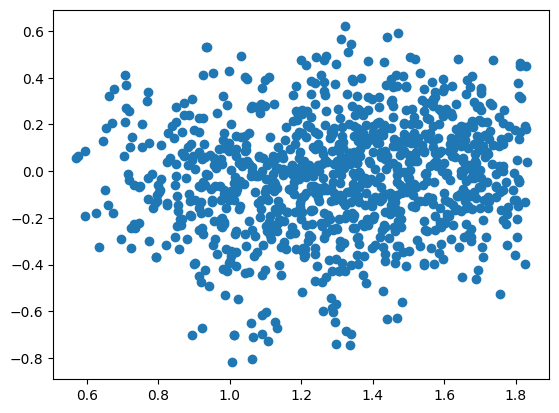

In [11]:
#plt.plot(reg.losses)
pred = reg.predict(x).reshape(-1, 1)
print(pred.shape, y.shape)
plt.scatter(y.reshape(-1, 1), pred)

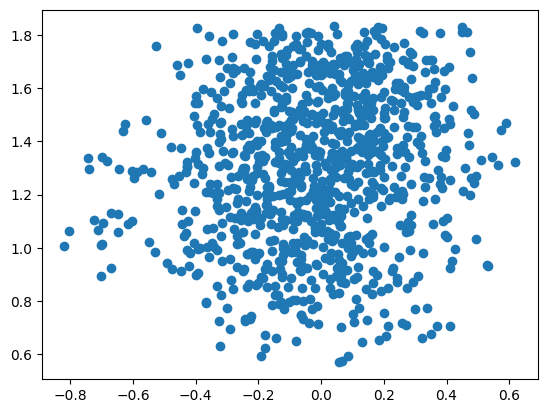

In [12]:
# best_model = reg
# #plt.plot(best_model.losses)
# print(grid_.best_params_)
# print(grid_.best_score_)
best_model = reg
pred = best_model.predict(x).reshape(-1,1)
plt.plot(pred.detach().numpy(), y.detach().numpy().reshape(-1,1), 'o')

In [13]:
trainer = kmk.trainer(**{'binary_dim':0, 'binary_dim_y':0, 'model_type':'NN', 'epochs':11,'lr_init':1e-3,
                       'batch_size':1000,'beta':0, 'gamma':0, 'layers':5, 'layer_size':100})
trainer.fit(x.reshape(-1, 1), y.reshape(-1, 1))

AttributeError: module 'kmodels' has no attribute 'trainer'

In [ ]:
plt.plot(trainer.losses)

In [ ]:
pred = trainer.predict(x.reshape(-1,1)).reshape(-1,1)
plt.scatter(pred, y)

In [ ]:
x

In [ ]:
new_model = kmk.NN(n_inputs=x.shape[1], n_outputs=y.shape[1], layers=2, layer_size=50)
reg = kmk.trainer({'n_inputs':x.shape[1], 'n_outputs':y.shape[1], 'layers':2, 'layer_size':50})
params = reg.params
reg.set_params(**params)

In [16]:
from ray import tune
import ray
import os

def train_model(config: dict):
    trainer = kmk.Trainer({'binary_dim':0, 'binary_dim_y':0, 'model_type':'NN', 'epochs':11,'lr_init':1e-3,
                           'batch_size':1000,'beta':0, 'gamma':0, 'layers':5, 'layer_size':100})
    trainer.set_params(**config)
    trainer.fit(x.reshape(-1, 1), y.reshape(-1, 1))
    return trainer


In [17]:
from ray.train.torch import TorchTrainer
from ray.air import ScalingConfig
# get the logging
ray.init(num_cpus=1, log_to_driver=False)
# For GPU Training, set `use_gpu` to True.
# trainer = Trainer(backend="torch", num_workers=2, use_gpu=True)
scaling_config = ScalingConfig(train_model, num_workers=1)
config = {}
trainer = TorchTrainer(train_loop_per_worker=train_model, train_loop_config=config)
trainer.fit()

2023-05-15 13:49:28,486	INFO worker.py:1616 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


: 

: 

In [ ]:
import ray

# Connect to the Ray cluster.
ray.init()

# Define a remote function to check the status of a worker.
@ray.remote
def check_worker_status(worker_id):
    # Add your logic here to check the worker's status.
    # For example:
    # return True if the worker is healthy, otherwise False.
    return True

# Get a list of all workers in the cluster.
all_workers = ray.nodes()

# Check the status of each worker in parallel.
worker_statuses = ray.get([check_worker_status.remote(worker["NodeID"]) for worker in all_workers])

# Print the status of each worker.
for worker, status in zip(all_workers, worker_statuses):
    print(f"Worker {worker['NodeID']} is {'healthy' if status else 'unhealthy'}.")


In [ ]:
trainer = train_model({'epochs':51})
plt.plot(trainer.losses)


In [ ]:
pred = trainer.predict(trainer.x).reshape(-1,1)
plt.scatter(pred, trainer.y)

In [ ]:
model = kmk.NN(n_inputs=x.shape[1], n_outputs=y.shape[1], layers=2, layer_size=50, change_layers=0)
model

In [ ]:
tlnn = kmk.TLNN(model, x, change_layers=1)
tlnn

In [ ]:
model.__init__(**model.params)